In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from rom_tools import romManager
from rom_tools import address
from rom_tools import byte_ops
from rom_tools.compress import decompress
from rom_tools.compress import compress

In [4]:
# Load the ROM
romM = romManager.RomManager("../sm_guinea_pig.smc")

Something is wrong with this rom


In [5]:
# Get the room header for room x0792b3
addr = address.Address(0x792b3)
print(addr)
room_header = romM.readFromRom(addr, 74)
print(room_header)

0x792b3
b'\x01\x00\x12\x02\x05\x01p\xa0\x00\xf9\x92\x12\xe6\x00\xdf\x92\xe6\xe5\xe8\xd6\xc2\x00\x00\x00\xe0\x80z\x84\xa1\x80\xc1\xc1\x00\x00\x00\x00\x00\x00X\x80\x99\xb8\xd3\x91\xe8\xd6\xc2\x00\t\x05\xe0\x80z\x84\xa1\x80\xc1\xc1\x00\x00\x00\x00\x00\x00X\x80\x99\xb8\xd3\x91F\x89R\x89'


In [6]:
# Get the leveldata as a PC address
#TODO...
leveldata_ptr_b = room_header[18:21]
leveldata_ptr = int.from_bytes(leveldata_ptr_b, byteorder='little')
print(leveldata_ptr)
print(hex(leveldata_ptr))
print(hex(byte_ops.PC_to_SNES(leveldata_ptr)))
level_addr = address.Address()
#level_addr.from_SNES(int.from_bytes(leveldata_ptr, byteorder='big'))
level_addr = 0x2156e8

12769000
0xc2d6e8
0x105d6e8


In [7]:
level_size = 0x100
#compressed_level_data = romM.readFromRom(level_addr+2, 763)
#compressed_level_data = romM.readFromRom(level_addr+2, 738)
compressed_level_data = romM.readFromRom(level_addr, 1244)

In [8]:
level_data = decompress.decompress(compressed_level_data)
len(level_data)

3842

In [9]:
#recompressed_level_data = compress.compress(level_data[0:1000], min_size=50, debug=True)
recompressed_level_data = compress.greedy_compress(level_data, min_size=1)
print(len(recompressed_level_data))
print(recompressed_level_data)

864
b"A\x00\n\xe9?D\x80H\x11\x89A\x81\x11\xc2\x04A\x14\x8dE\x0f\x89A\x14\x89\xc3\x10\xc5\x0e\xc2\x0c\xc7$\xc9\n\xc26A\x14\x8dA\xda\x8aA\xdb\x8aA\xda\x8e\xc3 A\x12\x81\xc4@\xcd*\xc4N\xc2JA\x8d\x11\xc60\xc3X\xc2bA\x19\x0eA\x1d\x0eA\x19\x14\xc4nA\xda\x1aA\xdb\x8aA\xdc\x8a\xc4$B\x8d\x14A\x0f\x8d\xc4 \xc2\x06\xc24\xc3R\xcaV\xc38\xc3:a\xffa\xffa\xffA\x0e\x19\xc9\x0e\xc2LA\x19\x11\xc6`B\x0f\x8d\xc4\xc0\xc5,A\xba\nA\xbb\nA\xba\x0e\xc5 \xc6\x8c\xd0N\xc2JA\x1d\x14\xc6\x96\xc3X\xc7bA\x10\x89A\x14\x8d\xc5BA\xbc\nA\r\x89\xc2XB\x8d\r\xc7 \xc3rB\x14\x8d\xc2\xda\xc2\xf8\xc6\x9c\xc7\x9a\xc5\xa0a\xffB\r\xf1AU\xff\xc6\x12\xc3\xee\xc3N\xd3\x1c\xc7\xce\xc3\xdaA\x10\x81\xc7\xeeA\x10\x85\xcbNB\x10\x89\xc2|\xce`A\x89\r\xc8\x14\xc3l\xcdT\xc3\xc8\xc3vA\x11\x8dA\x18\x89A\x0f\x89\xcf\x9c\xc4\xa0A\xd9\rA\xdd\xff\xd4N\xcf\x1c\xcd\xa8\x83\xec\x01\xcf\xee\xcd>\xd1\xe4\xc3l\xd3TA\r\x89A\x18\x89A@\x94A\x0c\xc4\xd3l\xcd\xd0\xcd\xde\xcd\xec\xcfv\xd1\x1e\xd30\xcb\xe4\xd56a\xffA\x0c\xc0A@\x90A`\x94A,\xd4\xd4\xa0\xcc\xd0\xc

In [10]:
#cf = open("tmp.bin", "wb")
#cf.write(compressed_level_data)
#cf.close()

In [11]:
#cf = open("tmp.bin", "wb")
#cf.write(recompressed_level_data)
#cf.close()

In [12]:
print(level_data[0:2])
int.from_bytes(level_data[0:2], byteorder='little')

b'\x00\n'


2560

In [13]:
from world_rando import tiles
from world_rando import room_viz

In [69]:
level = tiles.level_from_bytes(level_data, 80, 16)

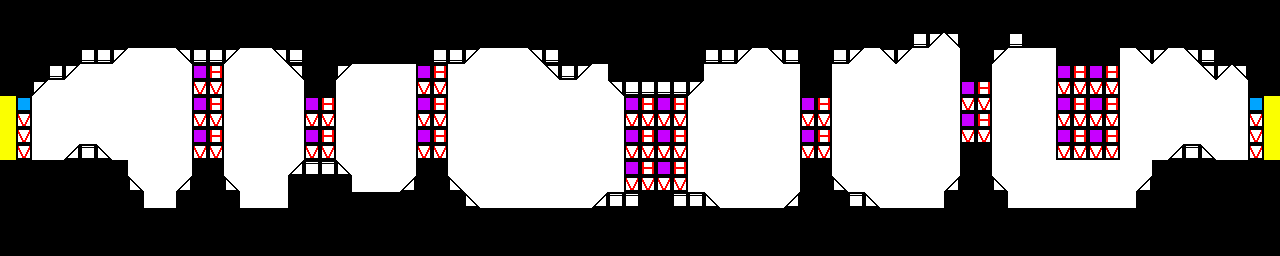

In [74]:
room_viz.room_viz(level, 80, 16, "test.png", "encoding/room_tiles")

In [75]:
offset = 402*2
tile_bytes = level_data[offset + 2:offset + 4]
tile_int = int.from_bytes(tile_bytes, byteorder="little")
tile_bts = level_data[(offset * 3)//2]

In [78]:
#print(tile_int >> 12)
#print((tile_int >> 10) & 1)
#print((tile_int >> 11) & 1)
#print(tile_int & 0b1111111111)